In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('data/clean_df.csv')

In [3]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


In [4]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [6]:
df = pd.get_dummies(df, columns=['main_category', 'sub_category', 'time_of_day', 'confirmed_time'])

In [7]:
df.head()

,incident_id,governorate,district,area,target,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,...,confirmed_time_23,confirmed_time_24,confirmed_time_3,confirmed_time_4,confirmed_time_5,confirmed_time_6,confirmed_time_7,confirmed_time_8,confirmed_time_9,confirmed_time_Unknown
date,,,,,,,,,,,,,,,,,,,,,
2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,1,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,1,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,1,2.0,29,21,3,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,1,2.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,1,2.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
len(df['governorate'].unique())

22

In [9]:
df['label'] = pd.Categorical(df['governorate'])

In [10]:
df['label'] = df['label'].cat.codes

In [11]:
df['label']

date
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
              ..
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    14
Name: label, Length: 22485, dtype: int8

In [12]:
X = df.drop(columns=['area', 'target', 'governorate', 'district'])
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, shuffle=False)

In [16]:
y_train = to_categorical(y_train, num_classes=22)
y_test = to_categorical(y_test, num_classes=22)

In [17]:
y_train.shape

(16863, 22)

In [18]:
y_test.shape

(5622, 22)

In [19]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [20]:
input_shape = X_train_ss[0].shape

In [25]:
model = Sequential()

model.add(Dense(128, input_shape=input_shape, activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dense(32, activation='relu'))

model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=100, batch_size = 512)

Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 2.9736 - acc: 0.0889 - val_loss: 2.4388 - val_acc: 0.3033
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 2.3190 - acc: 0.2865 - val_loss: 2.1758 - val_acc: 0.3326
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 1.9399 - acc: 0.3765 - val_loss: 1.8292 - val_acc: 0.4208
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 1.6287 - acc: 0.4498 - val_loss: 1.5238 - val_acc: 0.4895
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 1.3946 - acc: 0.5289 - val_loss: 1.3477 - val_acc: 0.5235
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 1.1519 - acc: 0.6220 - val_loss: 1.1602 - val_acc: 0.5651
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.9507 - acc: 0.6912 - val_loss: 1.0095 - val_acc: 0.6885
Epoch 8/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7900 - a

33/33 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.9996 - val_loss: 0.2658 - val_acc: 0.9774
Epoch 64/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.9988 - val_loss: 0.2802 - val_acc: 0.9742
Epoch 65/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0170 - acc: 0.9985 - val_loss: 0.2659 - val_acc: 0.9760
Epoch 66/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0124 - acc: 0.9994 - val_loss: 0.2701 - val_acc: 0.9747
Epoch 67/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0125 - acc: 0.9991 - val_loss: 0.2724 - val_acc: 0.9778
Epoch 68/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.9994 - val_loss: 0.2765 - val_acc: 0.9756
Epoch 69/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.9990 - val_loss: 0.2786 - val_acc: 0.9758
Epoch 70/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0065 - acc: 0

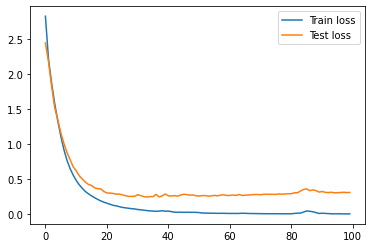

In [26]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

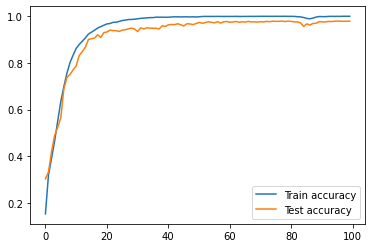

In [27]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();